In [1]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

In [6]:
from scipy import special

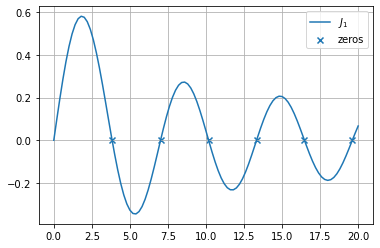

In [12]:
x = np.r_[0:20:101j]
n_zeros = 6
zeros = special.jn_zeros(1, n_zeros)

plt.plot(x, special.jn(1, x), label=r'$J_1$')
plt.scatter(zeros, np.zeros_like(zeros), marker='x', label='zeros')
plt.grid()
plt.legend()

In [14]:
from scipy import signal, ndimage

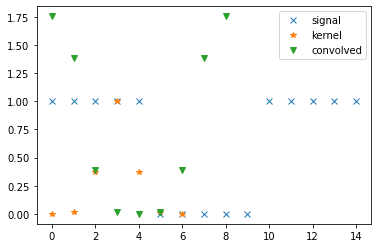

In [27]:
y = np.r_[np.ones(5), np.zeros(5), np.ones(5)]
x = np.arange(7)
k = np.exp(- (x - np.mean(x))**2)

plt.plot(y, 'x', label='signal')
plt.plot(k, '*', label='kernel')

y1 = signal.convolve(y, k, mode='valid')
plt.plot(y1, 'v', label='convolved')

plt.legend()

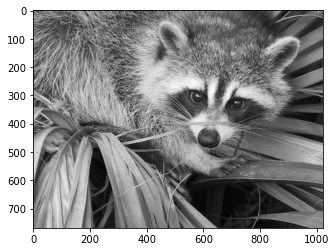

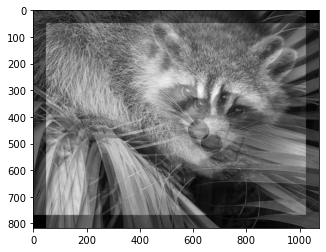

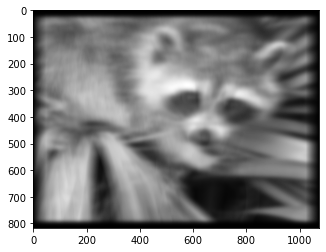

In [36]:
y = scipy.misc.face(gray=True)
plt.imshow(y, cmap='gray')

k = np.zeros((50, 50))
k[0, 0] = 1
k[-1, -1] = 1
convolved = signal.fftconvolve(y, k)

plt.figure()
plt.imshow(convolved, cmap='gray')

X, Y = np.mgrid[0:50, 0:50]
k = np.exp(- ((X-25)**2 + (Y-25)) / 10**2)
convolved = signal.fftconvolve(y, k)

plt.figure()
plt.imshow(convolved, cmap='gray')

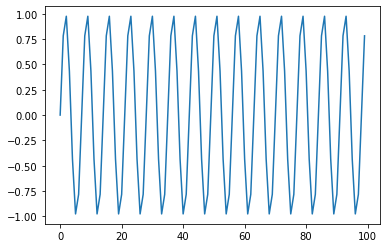

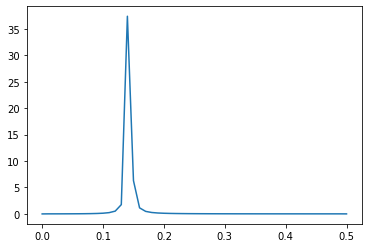

In [41]:
x = np.arange(100)
y = np.sin(x * 2*np.pi / 7)
plt.plot(x, y)

plt.figure()
plt.plot(*signal.periodogram(y))

(0.0, 1.0)

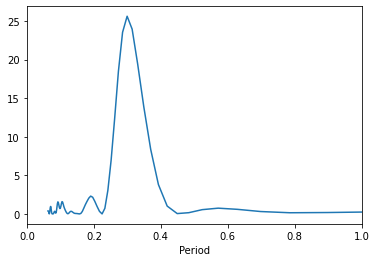

In [50]:
# import gatspy
x = np.random.rand(100)
y = np.sin(x * 2*np.pi / 0.3)
freq = np.linspace(1, 100, 100)
p = signal.lombscargle(x, y, freq)
plt.xlabel('Period')
plt.plot(2*np.pi / freq, p)
plt.xlim([0, 1])

In [51]:
from scipy import stats

In [58]:
rng = np.random.default_rng()
x = rng.normal(size=10000)
stats.anderson(x)

AndersonResult(statistic=0.5506337274346151, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [60]:
dist = stats.norm(-1, 2)
dir(dist)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'support',
 'var']

In [64]:
dist.a, dist.b

(-inf, inf)

In [65]:
dist.mean()

-1.0

In [66]:
dist.std()

2.0

In [68]:
dist.stats(moments='mvk')

(array(-1.), array(4.), array(0.))

In [78]:
dist.rvs((5, 2), random_state=0)

array([[ 2.52810469, -0.19968558],
       [ 0.95747597,  3.4817864 ],
       [ 2.73511598, -2.95455576],
       [ 0.90017684, -1.30271442],
       [-1.2064377 , -0.178803  ]])

In [79]:
dist.rvs((5, 2), random_state=0)

array([[ 2.52810469, -0.19968558],
       [ 0.95747597,  3.4817864 ],
       [ 2.73511598, -2.95455576],
       [ 0.90017684, -1.30271442],
       [-1.2064377 , -0.178803  ]])

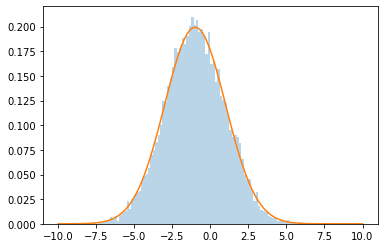

In [85]:
plt.hist(dist.rvs(10000), bins=100, density=True, alpha=0.3)
x = np.r_[-10:10:100j]
plt.plot(x, dist.pdf(x))

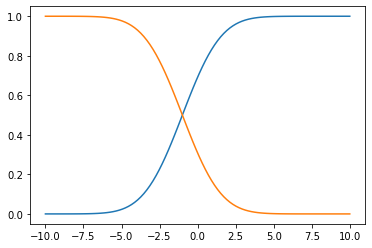

In [88]:
x = np.r_[-10:10:100j]
plt.plot(x, dist.cdf(x))
plt.plot(x, dist.sf(x))

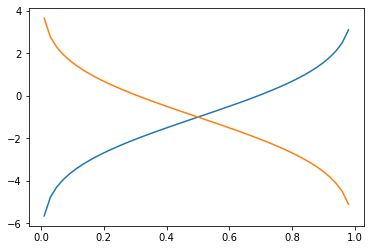

In [89]:
x = np.r_[-1:1:100j]
plt.plot(x, dist.ppf(x))
plt.plot(x, dist.isf(x))

In [91]:
stats.norm.rvs(-1, 2, (5, 2), random_state=0)

array([[ 2.52810469, -0.19968558],
       [ 0.95747597,  3.4817864 ],
       [ 2.73511598, -2.95455576],
       [ 0.90017684, -1.30271442],
       [-1.2064377 , -0.178803  ]])

In [92]:
from scipy.io import netcdf

In [93]:
from scipy import optimize

In [101]:
# import mcmc
# import lmfit

def f(x):
    return np.cbrt(x - np.sqrt(2))

result = optimize.bisect(f, 0, 2, xtol=1e-6, full_output=True)
print(result)

result = optimize.brentq(f, 0, 2, xtol=1e-6, full_output=True)
print(result)

(1.4142141342163086,       converged: True
           flag: 'converged'
 function_calls: 23
     iterations: 21
           root: 1.4142141342163086)
(1.4142136251953383,       converged: True
           flag: 'converged'
 function_calls: 19
     iterations: 18
           root: 1.4142136251953383)


RuntimeError: Failed to converge after 50 iterations, value is 1.9869643930966543.

In [102]:
def f(x):
    return (x - 0.5) ** 2

result = optimize.newton(f, 0, tol=1e-6, full_output=True)
print(result)

(0.4999984268581053,       converged: True
           flag: 'converged'
 function_calls: 27
     iterations: 26
           root: 0.4999984268581053)


In [106]:
optimize.root

<function scipy.optimize._root.root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)>

In [107]:
def f(x):
    return x**2 + 3*x + 5
    

optimize.fmin(f, x0=0, xtol=1e-6, full_output=1)

Optimization terminated successfully.
         Current function value: 2.750000
         Iterations: 32
         Function evaluations: 64


(array([-1.5]), 2.7500000000000004, 32, 64, 0)

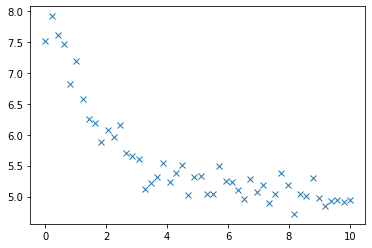

In [110]:
def f(x, a, b, c):
    return a * np.exp(x / c) + b


p_true = (3.0, 5.0, -2.0)
noise = 0.2
x = np.r_[0:10:50j]
y = f(x, *p_true) + np.random.normal(0, noise, x.shape)

plt.plot(x, y, 'x')

In [118]:
p0 = (2.5, 4.5, -1.5)
x_ = np.r_[0:10:100j]

      fun: 1.9053378833744923
 hess_inv: array([[ 0.17534288, -0.01060516,  0.08513581],
       [-0.01060516,  0.03272666,  0.07502424],
       [ 0.08513581,  0.07502424,  0.32710314]])
      jac: array([-8.94069672e-08, -5.51342964e-07,  1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([ 3.00674979,  4.98930592, -1.93072636])


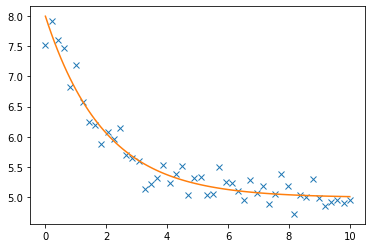

In [119]:
# Не надо так
result = optimize.minimize(
    lambda p: np.sum(np.square(f(x, *p) - y)),
    x0=p0,
)
print(result)
plt.plot(x, y, 'x')
plt.plot(x_, f(x_, *result.x))

 active_mask: array([0., 0., 0.])
        cost: 0.9526689416872571
         fun: array([ 0.48249734, -0.2187015 , -0.18529611, -0.290234  ,  0.13492966,
       -0.42488002,  0.01170125,  0.17736613,  0.0924691 ,  0.27659862,
       -0.0470366 , -0.03028768, -0.31332444,  0.05417339,  0.02456785,
        0.00287546,  0.41712319,  0.27273276,  0.12590929, -0.14227517,
        0.1217136 , -0.05834596, -0.22688317,  0.22385595, -0.09318721,
       -0.1355789 ,  0.14142206,  0.11863041, -0.35269442, -0.12117486,
       -0.11616412, -0.00136988,  0.13782549, -0.19528211,  0.00170745,
       -0.12232297,  0.16747264,  0.00363427, -0.34113968, -0.14678716,
        0.31335876, -0.01270992,  0.01745826, -0.27272837,  0.04152265,
        0.1696622 ,  0.08831916,  0.06541347,  0.10229426,  0.06116956])
        grad: array([-2.85566015e-11, -4.02424760e-11, -2.45048412e-07])
         jac: array([[ 1.        ,  1.        , -0.        ],
       [ 0.89969272,  1.        , -0.14809961],
       [ 0.8094

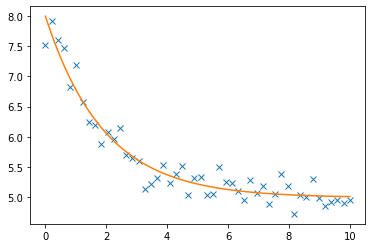

In [130]:
def jac(x, a, b, c):
    """Jacobian of a * np.exp(x / c) + b"""
    dfda = np.exp(x / c)
    dfdb = np.ones_like(x)
    dfdc = -a * np.exp(x / c) * x / c**2
    return np.stack([dfda, dfdb, dfdc]).T


result = optimize.least_squares(
    lambda p: f(x, *p) - y,
    x0=p0,
    jac=lambda p: jac(x, *p),
)
print(result)
plt.plot(x, y, 'x')
plt.plot(x_, f(x_, *result.x))

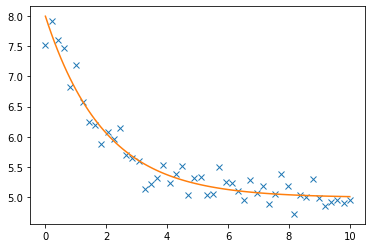

In [135]:
p, sigma = optimize.curve_fit(f, xdata=x, ydata=y, p0=p0)
plt.plot(x, y, 'x')
plt.plot(x_, f(x_, *p))

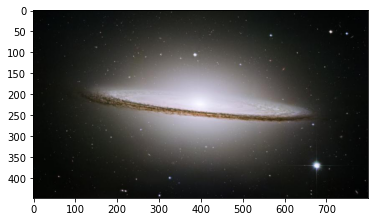

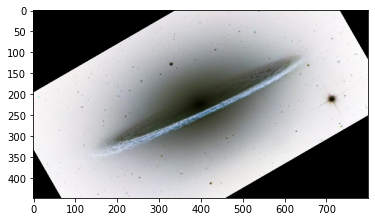

In [149]:
from scipy import ndimage
from PIL import Image

with Image.open('sombrero.png') as img:
    x = np.array(img)

plt.imshow(x)

# x_median = ndimage.filters.median_filter(x, size=3)
# plt.imshow(x - x_median)

x_rotated = ndimage.rotate(x, 30, reshape=False)
plt.figure()
plt.imshow(-x_rotated)